# Description: 


Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

# Tasks:
* Finds out factors which affects emp attition 
* Find out factors on which affecting factors are depends. 
* Use Statistical tools to prove inference. 


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [2]:
data = pd.read_csv("IBM_hr_data_attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Shape(size of the dataset)
data.shape

(1470, 35)

Dataset has 1470 rows and 35 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

 No null values in the dataset that's great

In [5]:
from pandas_profiling import ProfileReport

In [6]:
#report = ProfileReport(data, title = 'Pandas_profiling', explorative = True)

In [7]:
#report.to_file("widgets.html")

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
print(data.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

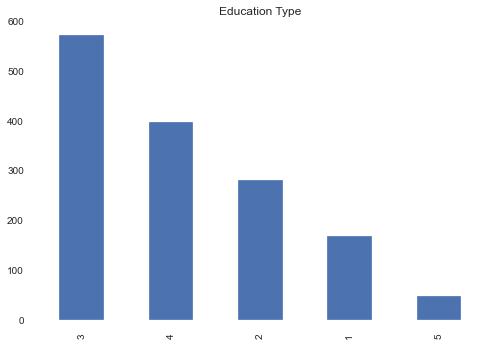

In [10]:
#Educational qualification
data['Education'].value_counts().plot.bar(title='Education Type')

The maaximum employees have 3rd category of education, This might be bachelors.


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
#data.Attrition = le.fit_transform(data.Attrition)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
list(set(data.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [14]:
data_num = data.select_dtypes(include = ['float64', 'int64', 'int32'])
data_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


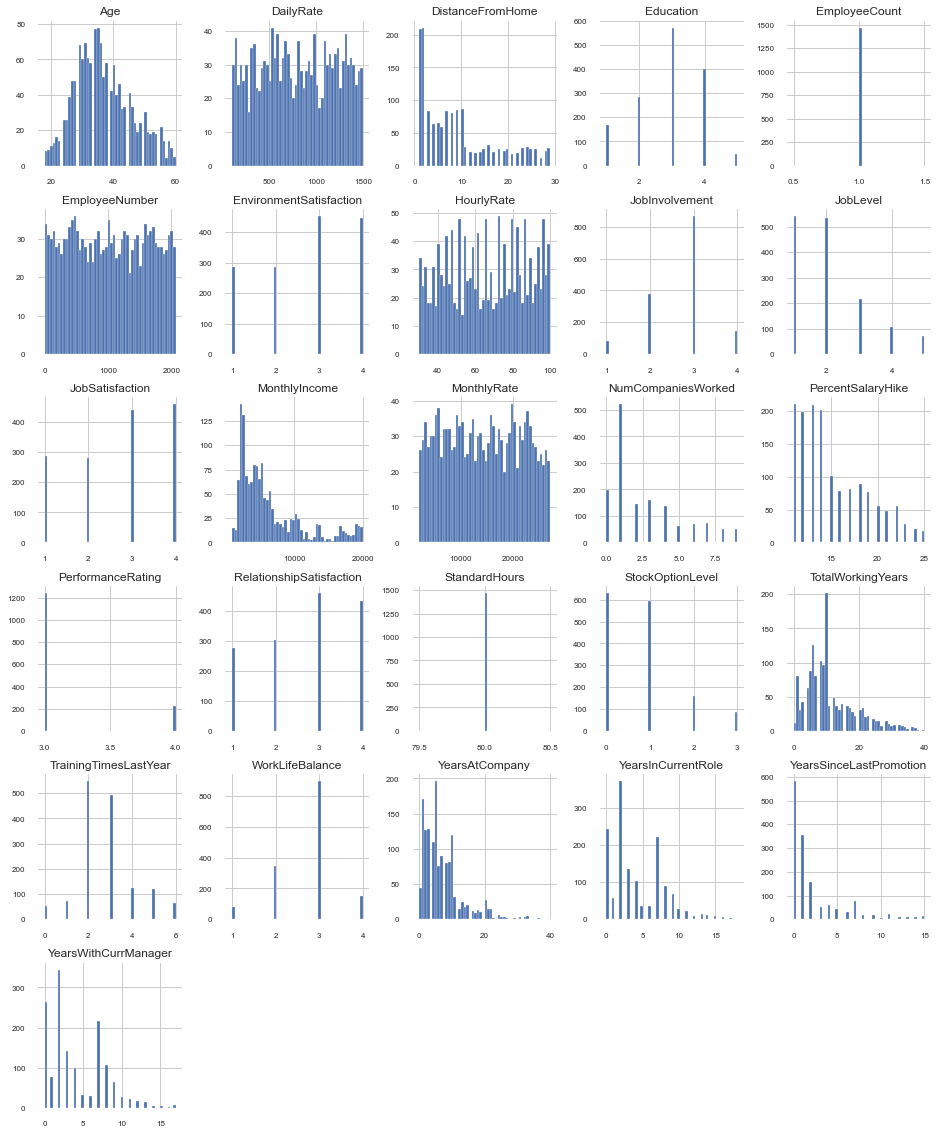

In [15]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [16]:
#corr = data_num.drop('Attrition', axis=1).corr()
#plt.figure(figsize=(12, 10))

#sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            #cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            #annot=True, annot_kws={"size": 8}, square=True);

In [17]:
data['Attrition'] = data['Attrition'].map({ 
    'No': 0, 
    'Yes': 1
}.get)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
data['Gender'] = data['Gender'].map({ 
    'Male': 0, 
    'Female': 1
}.get)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


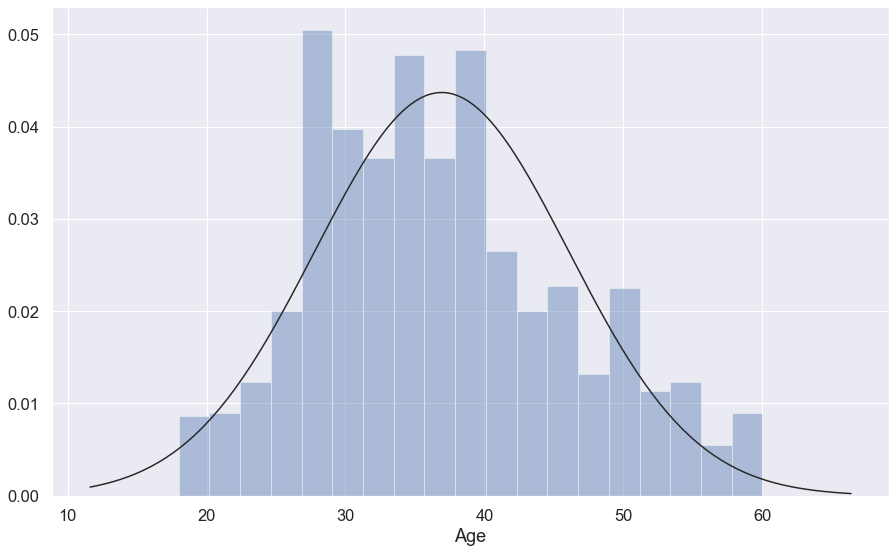

In [19]:
#Age range
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=data.Age, kde=False, fit=norm)

Age is normally distrubuted, most of the employees are aged around 30 - 40

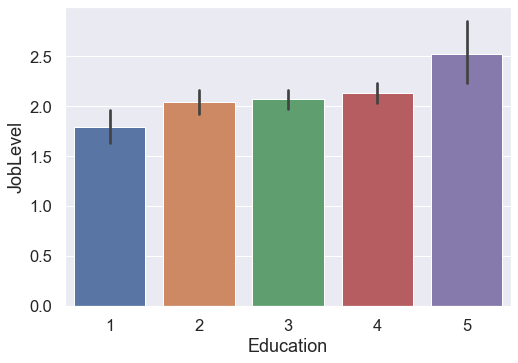

In [20]:
#education vs jobLevel
sns.barplot(x="Education", y="JobLevel", data=data);

* As per the above plot the education level affects the job level
* let me see if the job level affects the attrition
 

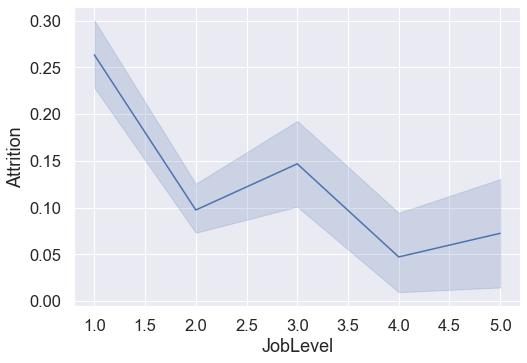

In [21]:
#education vs jobLevel
sns.lineplot(x="JobLevel", y="Attrition", data=data);

By seeing the above plot it is clear that joblevel affects the attrition
* Job level1 has maximum attrition
* Job level5 has minimum attrition

<Figure size 720x1080 with 0 Axes>

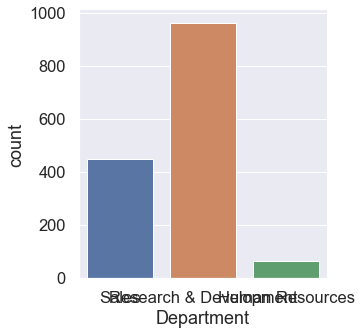

In [22]:
plt.figure(figsize=(10, 15))
sns.catplot(x="Department", kind="count", data=data);

*So R and D has maximum number of employees
*now let me see does the department affect the attrition


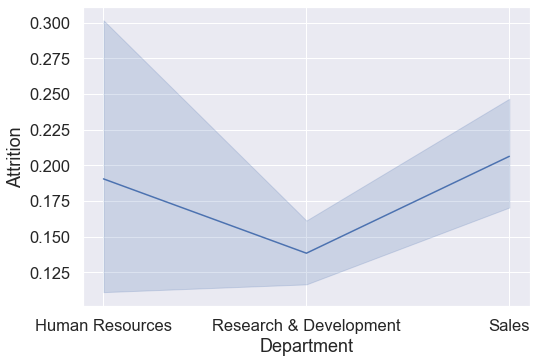

In [23]:
#attrition vs dept
sns.lineplot(x="Department", y="Attrition", data=data);

* So here R and D has less attrition and sales department has maximum attrition
* Let me see the reason for high attrition in Sales and HR dept


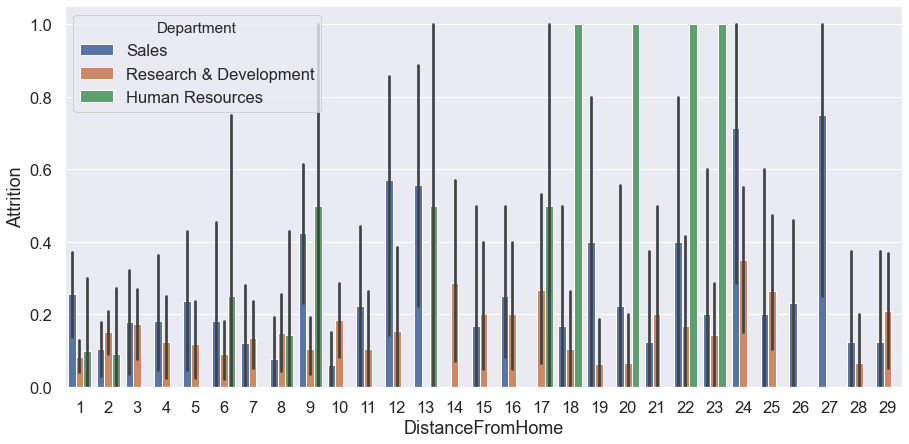

In [24]:
#attrition vs dept
plt.figure(figsize=(15, 7))
sns.barplot(x="DistanceFromHome", y="Attrition",hue = 'Department' ,data=data);

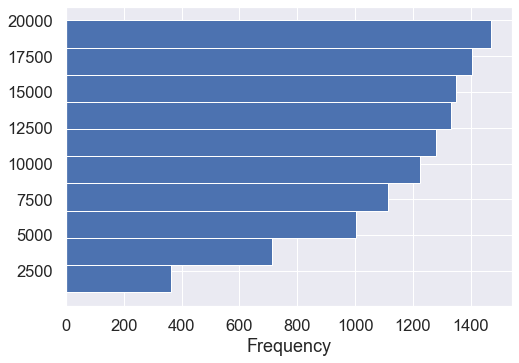

In [25]:
 data['MonthlyIncome'].plot.hist(orientation='horizontal', cumulative=True)

So here the distance may be the reason for attrition but not for all

In [26]:
data["MonthlyIncome"] = data["MonthlyIncome"].astype(int,copy=True)

In [27]:
bins = np.linspace(min(data["MonthlyIncome"]),max(data["MonthlyIncome"]),4)
bins

array([ 1009.,  7339., 13669., 19999.])

In [28]:
group_names = ['Low', 'Medium', 'High']

In [29]:
data['Salary'] = pd.cut(data['MonthlyIncome'], bins, labels=group_names ,include_lowest = True)
data[['MonthlyIncome','Salary']].head(20)

,MonthlyIncome,Salary
0,5993,Low
1,5130,Low
2,2090,Low
3,2909,Low
4,3468,Low
5,3068,Low
6,2670,Low
7,2693,Low
8,9526,Medium
9,5237,Low


Text(0.5, 1.0, 'Salary')

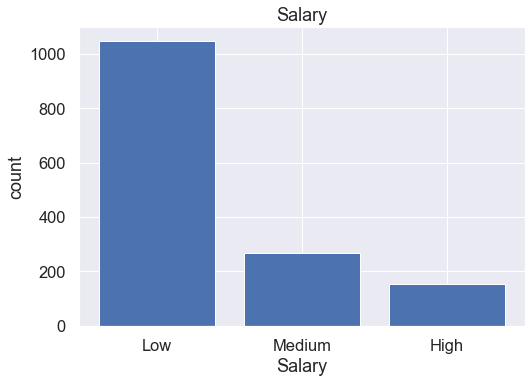

In [30]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, data["Salary"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Salary")
plt.pyplot.ylabel("count")
plt.pyplot.title("Salary")

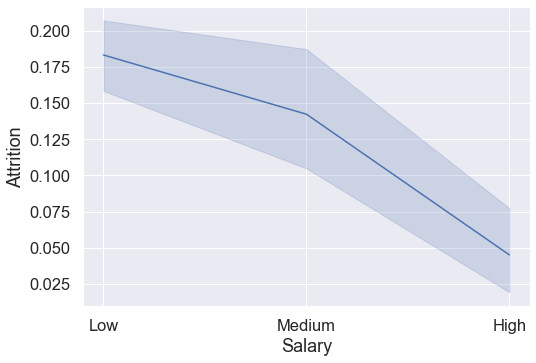

In [31]:
#Salary vs attrition
sns.lineplot(x="Salary", y="Attrition", data=data);

So Salary is a factor that highly affects the attrition

* now let me see the salaries for the departments

In [32]:
#data['Department'] = data['Department'].map({ 
    #'Sales': 1, 
    #'Research & Development': 2, 'Human Resources': 3
#}.get)
#data.head()

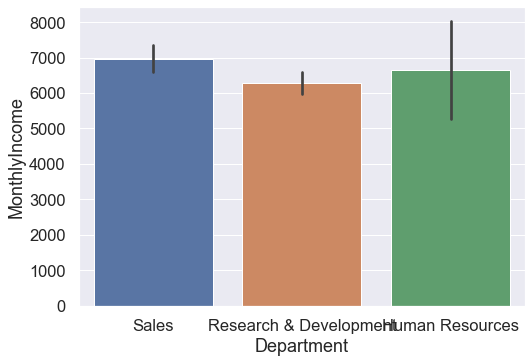

In [38]:
#dept vs income
sns.barplot(x="Department", y="MonthlyIncome", data=data);

even though R and D has less income compared to Sales and Hr dept attrititon is less

<Figure size 720x720 with 0 Axes>

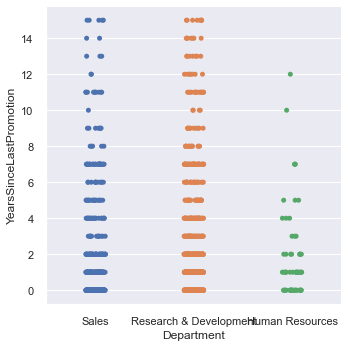

In [65]:
plt.figure(figsize=(10,10))
sns.catplot(x = 'Department', y = 'YearsSinceLastPromotion', data = data)

So promotion may be the possible reason for attrition as hr dept has less promotion and more attrition

In [ ]:
#sns.countplot(y='job', data=df)

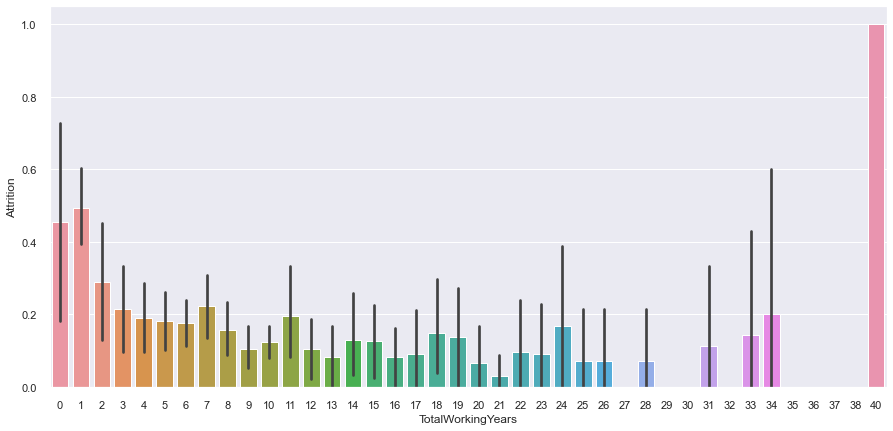

In [52]:
plt.figure(figsize=(15, 7))
sns.barplot(x = 'TotalWorkingYears', y = 'Attrition', data = data)

Looks like some outliers are present, let me check

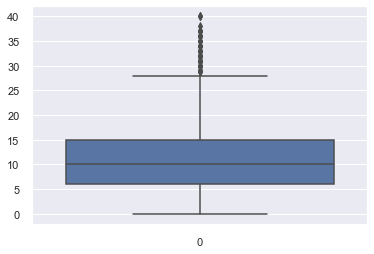

In [54]:
sns.boxplot(data = data['TotalWorkingYears'])

In [56]:
print(data['TotalWorkingYears'].quantile(0.5))
print(data['TotalWorkingYears'].quantile(0.95))

10.0
28.0


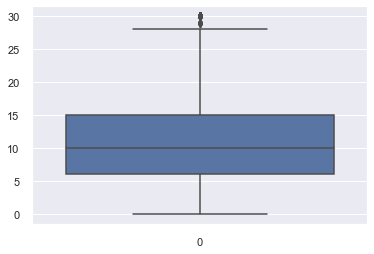

In [58]:
data["TotalWorkingYears"] = np.where(data["TotalWorkingYears"] <0.0, 0.0,data['TotalWorkingYears'])
data["TotalWorkingYears"] = np.where(data["TotalWorkingYears"] >30.0, 30.0,data['TotalWorkingYears'])
sns.boxplot(data = data['TotalWorkingYears'])

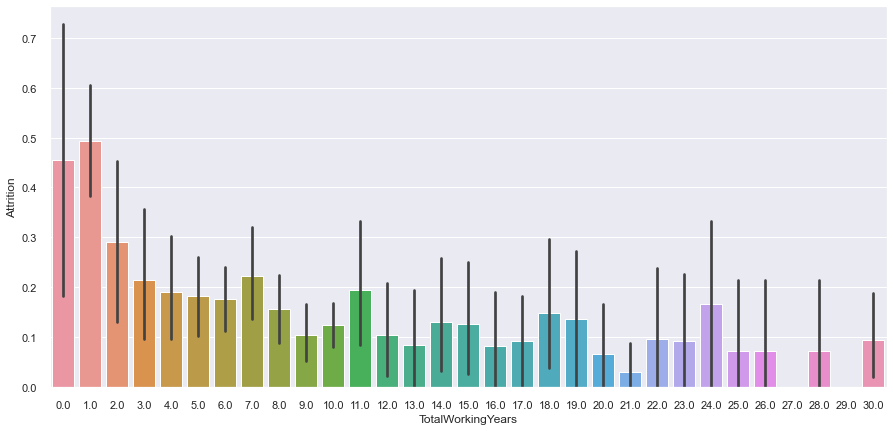

In [59]:
#Totalyears(Experience) vs Attrition
plt.figure(figsize=(15, 7))
sns.barplot(x = 'TotalWorkingYears', y = 'Attrition', data = data)

As per the above plot, employees working for longer period in the company are less likely to attrite. The reason for this may be due to high salary

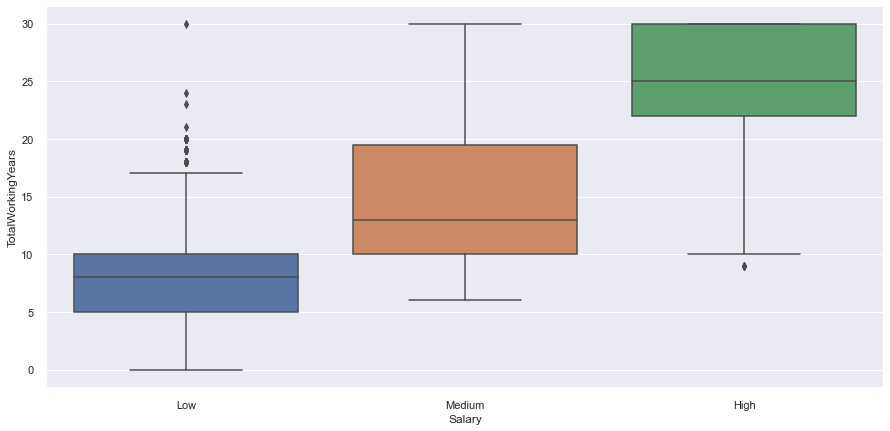

In [68]:
#Salary vs Years
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'Salary', y = 'TotalWorkingYears', data = data)

its clear that as the salary increases with the experience, hence the employee are less likely to attrite

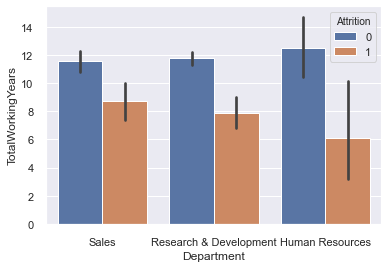

In [75]:
sns.barplot(x = 'Department', y = 'TotalWorkingYears', hue = 'Attrition', data = data)